In [4]:
# # Install essential packages
# install.packages("tidyverse")
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("caret")
# install.packages("randomForest")
# install.packages("e1071")

### Import Libraries

In [14]:
# Load essential libraries
library(tidyverse)
library(caret)
library(ggplot2)
library(randomForest)
library(e1071)

# Install and load the conflicted package (if not installed, install first)
if (!requireNamespace("conflicted", quietly = TRUE)) {
  install.packages("conflicted")
}
library(conflicted)

# Explicitly resolve conflicts
conflicted::conflict_prefer("filter", "dplyr")  # Always use dplyr::filter()
conflicted::conflict_prefer("lag", "dplyr")     # Always use dplyr::lag()


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::l

### Load Data set

In [3]:
# Get the current directory
getwd()

[1] "/home/jparep/proj/healthcare-analytics-with-R"

In [15]:
data <- read.csv("./data/US_chronic_disease_indicator.csv")

### EDA

In [16]:
# Get summary of the data
summary(data)

   YearStart       YearEnd     LocationAbbr       LocationDesc      
 Min.   :2001   Min.   :2001   Length:403984      Length:403984     
 1st Qu.:2011   1st Qu.:2012   Class :character   Class :character  
 Median :2013   Median :2013   Mode  :character   Mode  :character  
 Mean   :2013   Mean   :2013                                        
 3rd Qu.:2014   3rd Qu.:2014                                        
 Max.   :2016   Max.   :2016                                        
                                                                    
  DataSource           Topic             Question         Response      
 Length:403984      Length:403984      Length:403984      Mode:logical  
 Class :character   Class :character   Class :character   NA's:403984   
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
          

In [17]:
# Shape of the data
dim(data)

[1] 403984     34

In [18]:
# Display the data structure
str(data)

'data.frame':	403984 obs. of  34 variables:
 $ YearStart                : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ YearEnd                  : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ LocationAbbr             : chr  "AK" "AL" "AR" "AZ" ...
 $ LocationDesc             : chr  "Alaska" "Alabama" "Arkansas" "Arizona" ...
 $ DataSource               : chr  "YRBSS" "YRBSS" "YRBSS" "YRBSS" ...
 $ Topic                    : chr  "Alcohol" "Alcohol" "Alcohol" "Alcohol" ...
 $ Question                 : chr  "Alcohol use among youth" "Alcohol use among youth" "Alcohol use among youth" "Alcohol use among youth" ...
 $ Response                 : logi  NA NA NA NA NA NA ...
 $ DataValueUnit            : chr  "%" "%" "%" "%" ...
 $ DataValueType            : chr  "Crude Prevalence" "Crude Prevalence" "Crude Prevalence" "Crude Prevalence" ...
 $ DataValue                : chr  "22" "30.7" "27.6" "34.8" ...
 $ DataValueAlt             : num  22 30.7 27.6 34.8 2

In [19]:
# Check for missing values
colSums(is.na(data))

YearStart                   YearEnd              LocationAbbr 
                        0                         0                         0 
             LocationDesc                DataSource                     Topic 
                        0                         0                         0 
                 Question                  Response             DataValueUnit 
                        0                    403984                         0 
            DataValueType                 DataValue              DataValueAlt 
                        0                         0                    130318 
  DataValueFootnoteSymbol         DatavalueFootnote        LowConfidenceLimit 
                        0                         0                    157165 
      HighConfidenceLimit   StratificationCategory1           Stratification1 
                   157165                         0                         0 
  StratificationCategory2           Stratification2   StratificationCategory3 
                   403984                    403984                    403984 
          Stratification3               GeoLocation                ResponseID 
                   403984                         0                    403984 
               LocationID                   TopicID                QuestionID 
                        0                         0                         0 
          DataValueTypeID StratificationCategoryID1         StratificationID1 
                        0                         0                         0 
StratificationCategoryID2         StratificationID2 StratificationCategoryID3 
                   403984                    403984                    403984 
        StratificationID3 
                   403984

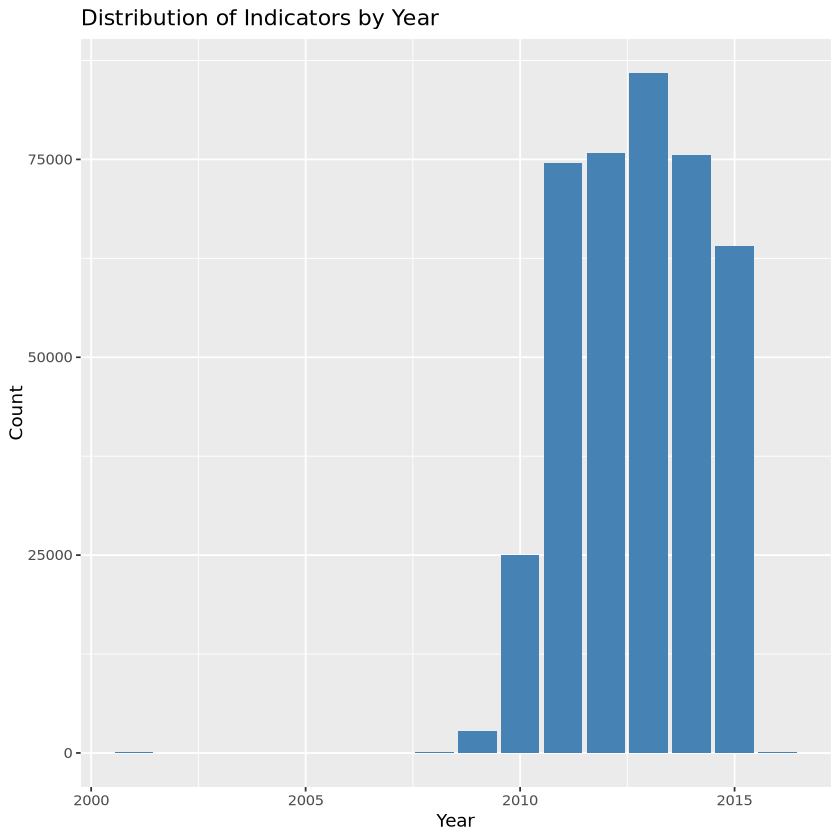

In [20]:
# Plot distribution of indicators by year
ggplot(data, aes(x = YearStart)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Indicators by Year", x = "Year", y = "Count")
